FSK

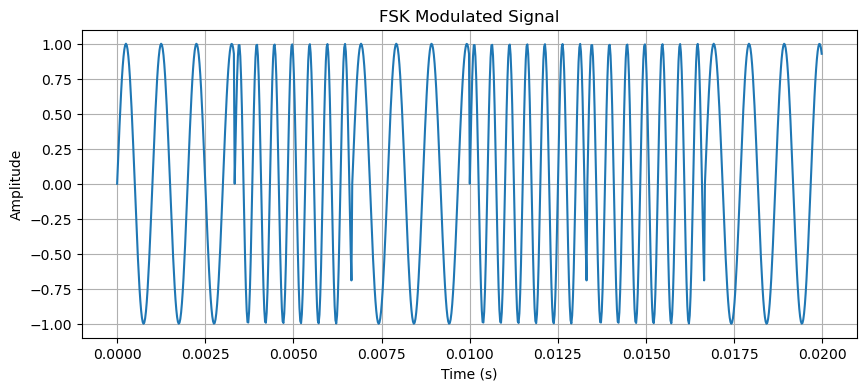

In [1]:
import numpy as np
import matplotlib.pyplot as plt


sampling_rate = 44100  
baud_rate = 300      
f0 = 1000            
f1 = 2000            
amplitude = 1
data = np.array([0, 1, 0, 1, 1, 0])
t_bit = 1.0 / baud_rate
samples_per_bit = int(sampling_rate * t_bit)

fsk_signal = np.array([])
time_axis = np.array([])
for bit in data:
    t = np.linspace(0, t_bit, samples_per_bit, endpoint=False)
    if bit == 0:
        segment = amplitude * np.sin(2 * np.pi * f0 * t)
    else:
        segment = amplitude * np.sin(2 * np.pi * f1 * t)
    fsk_signal = np.append(fsk_signal, segment)
    time_axis = np.append(time_axis, t + (len(time_axis) / sampling_rate))

# Plotting the FSK signal
plt.figure(figsize=(10, 4))
plt.plot(time_axis, fsk_signal)
plt.title("FSK Modulated Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

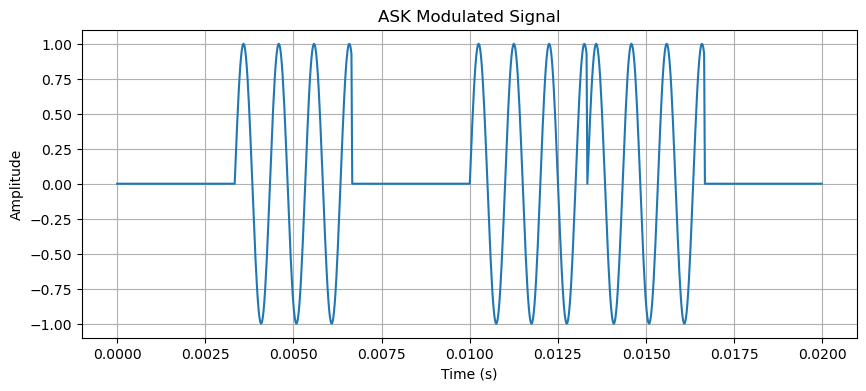

In [5]:
#ASK

import numpy as np
import matplotlib.pyplot as plt


sampling_rate = 44100  
baud_rate = 300      
f0 = 1000            
f1 = 2000            
amplitude = 1

amplitude1 = 0
data = np.array([0, 1, 0, 1, 1, 0])
t_bit = 1.0 / baud_rate
samples_per_bit = int(sampling_rate * t_bit)

fsk_signal = np.array([])
time_axis = np.array([])
for bit in data:
    t = np.linspace(0, t_bit, samples_per_bit, endpoint=False)
    if bit == 0:
        segment = amplitude1 * np.sin(2 * np.pi * f0 * t)
    else:
        segment = amplitude * np.sin(2 * np.pi * f0 * t)
    fsk_signal = np.append(fsk_signal, segment)
    time_axis = np.append(time_axis, t + (len(time_axis) / sampling_rate))

# Plotting the FSK signal
plt.figure(figsize=(10, 4))
plt.plot(time_axis, fsk_signal)
plt.title("ASK Modulated Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

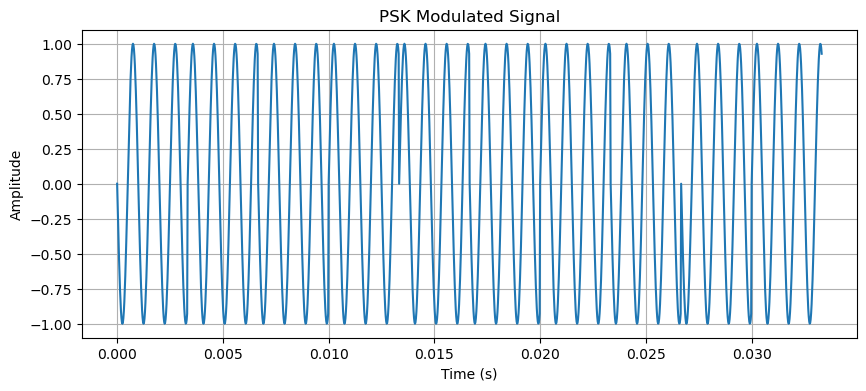

In [10]:
#ASK

import numpy as np
import matplotlib.pyplot as plt


sampling_rate = 44100  
baud_rate = 300      
f0 = 1000            
f1 = 2000            
amplitude = 1
phase=np.pi
amplitude1 = 0
data = np.array([0, 1, 0, 1, 1, 0, 1, 0 ,0, 1 ])
t_bit = 1.0 / baud_rate
samples_per_bit = int(sampling_rate * t_bit)

fsk_signal = np.array([])
time_axis = np.array([])
for bit in data:
    t = np.linspace(0, t_bit, samples_per_bit, endpoint=False)
    if bit == 0:
        segment = amplitude * np.sin(2 * np.pi * f0 * t + phase)
    else:
        segment = amplitude * np.sin(2 * np.pi * f0 * t)
    fsk_signal = np.append(fsk_signal, segment)
    time_axis = np.append(time_axis, t + (len(time_axis) / sampling_rate))

# Plotting the FSK signal
plt.figure(figsize=(10, 4))
plt.plot(time_axis, fsk_signal)
plt.title("PSK Modulated Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

In [16]:
def b8zs_scramble(binary_data):

    output = []
    zero_count = 0
    last_nonzero_polarity = 1  

    for bit in binary_data:
        if bit == '0':
            zero_count += 1
        else:
            if zero_count >= 8:
                substitution = ['0', '0', '0']
                if last_nonzero_polarity == 1: 
                    substitution.extend(['1', '-1', '0', '-1', '1'])
                else: 
                    substitution.extend(['-1', '1', '0', '1', '-1'])
                output.extend(substitution)
            else:
                output.extend(['0'] * zero_count)
            
            output.append(bit)
            last_nonzero_polarity = 1 if bit == '1' else -1  
            zero_count = 0
    if zero_count >= 8:
        substitution = ['0', '0', '0']
        if last_nonzero_polarity == 1:
            substitution.extend(['1', '-1', '0', '-1', '1'])
        else:
            substitution.extend(['-1', '1', '0', '1', '-1'])
        output.extend(substitution)
        output.extend(['0'] * (zero_count - 8))
    else:
        output.extend(['0'] * zero_count)

    return "".join(output)


data = "0000000010000000"
scrambled_data = b8zs_scramble(data)
print(f"Original:  {data}")
print(f"Scrambled: {scrambled_data}")

Original:  0000000010000000
Scrambled: 0001-10-1110000000


In [17]:
def hdb3_scrambling(binary_data):


    ami_encoded = []
    last_nonzero_polarity = 1  # 1 for positive, -1 for negative
    nonzero_pulse_count = 0
    zero_count = 0

    for bit in binary_data:
        if bit == '1':
            zero_count = 0
            nonzero_pulse_count += 1
            ami_encoded.append(str(last_nonzero_polarity))
            last_nonzero_polarity *= -1 
        else:  
            zero_count += 1
            if zero_count == 4:
                if nonzero_pulse_count % 2 == 1:
                    ami_encoded.extend(['0', '0', '0', str(last_nonzero_polarity)])
                    last_nonzero_polarity *= -1 
                    nonzero_pulse_count += 1 
                else:
                    ami_encoded.extend([str(last_nonzero_polarity), '0', '0', str(last_nonzero_polarity)])
                    nonzero_pulse_count += 2 
                zero_count = 0  
            else:
                ami_encoded.append('0')

    return ''.join(ami_encoded)

# Example usage:
binary_input = "011000010000000010000"
hdb3_output = hdb3_scrambling(binary_input)
print(f"Original: {binary_input}")
print(f"HDB3 Scrambled: {hdb3_output}")

Original: 011000010000000010000
HDB3 Scrambled: 01-100010011000000-100010011000000-1
